In [110]:
import tensorflow as tf
import os
from pathlib import Path

In [152]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)


In [153]:
# Data Reading
def get_label(file_path):
    # Extract the label from the filename
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
    print(type(file_path), file_path)
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    return tf.strings.split(file_path, os.sep)[-1]

def get_label_2(file_path):
    # Extract the filename from the file path
    print("yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy")
    print(type(file_path), file_path)
    print("YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY")
    filename = tf.strings.split(file_path, os.sep)[-1]
    # Remove specific characters (e.g., remove underscores) and transform to uppercase
    name = tf.strings.regex_replace(filename, '_|.jpg', '')
    cleaned_name = tf.strings.regex_replace(name, '[0-9]', '')
    label = tf.strings.upper(cleaned_name)
    return label

def decode_img(img):
    # Convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # Resize the image to the desired size
    return tf.image.resize(img, [128, 128])

def process_path(file_path):
    label = get_label_2(file_path)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

def load_dataset(data_dir):
    # Get list of all image file paths
    list_ds = tf.data.Dataset.list_files(str(Path(data_dir) / '*.jpg'))
    # Map the process_path function to each file path
    labeled_ds = list_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
    return labeled_ds

def load_dataset(data_dir):
    # Get list of all image file paths
    
    list_ds = tf.data.Dataset.list_files(str(Path(data_dir) / '*.jpg'))
    # Map the process_path function to each file path
    labeled_ds = list_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
    return labeled_ds


In [184]:
# Data display
def show_examples(dataset, num_examples=5, times=5):
    plt.figure(figsize=(10, 10))
    for t in range(times):
        for i, (image, label) in enumerate(dataset.take(num_examples)):
            ax = plt.subplot(1, num_examples, i + 1)
            plt.imshow(image.numpy().astype("uint8"))
            plt.title(label.numpy().decode('utf-8'))
            plt.title(f"{label.numpy().decode('utf-8')}\n{image.numpy().astype("uint8").shape}")
            plt.axis("off")
        plt.show()
        display("-----------------")
        

In [185]:
def show_batch_examples_orig(dataset, num_batches=1):
    plt.figure(figsize=(10, 10))
    for batch in dataset.take(num_batches):
        images, labels = batch
        for i in range(len(images)):
            ax = plt.subplot(5, 10, i + 1)# Adjust the subplot grid size as needed            
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(labels[i].numpy().decode('utf-8'))
            plt.axis("off")
        plt.show()

def show_batch_examples(dataset, num_batches=1):
    b = 0
    plt.figure(figsize=(10, 10))
    for batch in dataset.take(num_batches):
        print(f"BATCH {b}")
        images, labels = batch
        # for i in range(len(images)):
        print("Len images: ", len(images))
        for i, image in enumerate(images):
            ax = plt.subplot(4, 8, i + 1)  # Adjust the subplot grid size as needed
            # display(images[i].numpy().astype("uint8"))
            print(labels[i])
            display(images[i].numpy().astype("uint8").shape)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f"{labels[i].numpy().decode('utf-8')}\n{images[i].numpy().astype("uint8").shape}")
        plt.show()
        b = b + 1





In [186]:
# Example usage
DATA_DIR = Path("/home/sam/howest/howest-dl/sessie_02/opdracht/Face_Recognition/2_Classes")
dataset = load_dataset(DATA_DIR)
print(len(dataset))


yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy
<class 'tensorflow.python.framework.ops.SymbolicTensor'> Tensor("args_0:0", shape=(), dtype=string)
YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY
10


In [195]:
print(dataset)

for i, (image, label) in enumerate(dataset.take(5)):
    print(type(label), label)
    print("---", type(image), image.shape)


<_ParallelMapDataset element_spec=(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(b'G GG ', shape=(), dtype=string)
--- <class 'tensorflow.python.framework.ops.EagerTensor'> (128, 128, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(b'D DD ', shape=(), dtype=string)
--- <class 'tensorflow.python.framework.ops.EagerTensor'> (128, 128, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(b'C CC ', shape=(), dtype=string)
--- <class 'tensorflow.python.framework.ops.EagerTensor'> (128, 128, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(b'H HH ', shape=(), dtype=string)
--- <class 'tensorflow.python.framework.ops.EagerTensor'> (128, 128, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(b'B BB ', shape=(), dtype=string)
--- <class 'tensorflow.python.framework.ops.EagerTensor'> (128, 128, 3)


In [188]:
# To use the dataset for training
dataset_batched = dataset.batch(2).repeat(10).prefetch(buffer_size=tf.data.AUTOTUNE)
print(dataset_batched)
print(len(dataset_batched))

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>
50


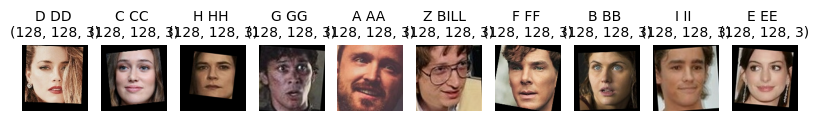

'-----------------'

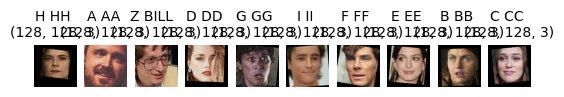

'-----------------'

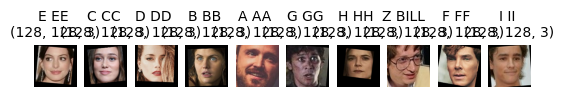

'-----------------'

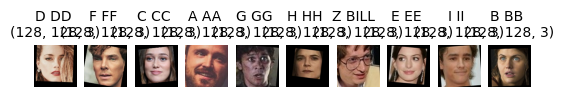

'-----------------'

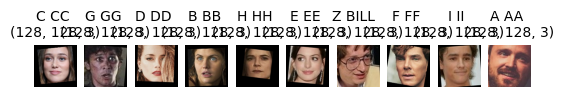

'-----------------'

In [189]:
# Example usage
show_examples(dataset, num_examples=10, times=5)



BATCH 0
Len images:  2
tf.Tensor(b'H HH ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'B BB ', shape=(), dtype=string)


(128, 128, 3)

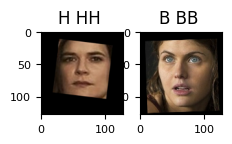

BATCH 1
Len images:  2
tf.Tensor(b'C CC ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'D DD ', shape=(), dtype=string)


(128, 128, 3)

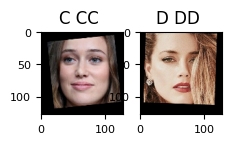

BATCH 2
Len images:  2
tf.Tensor(b'Z BILL  ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'E EE ', shape=(), dtype=string)


(128, 128, 3)

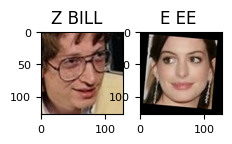

BATCH 3
Len images:  2
tf.Tensor(b'F FF ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'G GG ', shape=(), dtype=string)


(128, 128, 3)

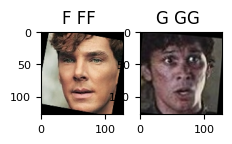

BATCH 4
Len images:  2
tf.Tensor(b'I II ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'A AA ', shape=(), dtype=string)


(128, 128, 3)

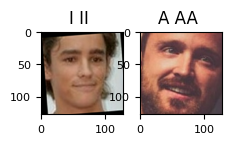

BATCH 5
Len images:  2
tf.Tensor(b'G GG ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'C CC ', shape=(), dtype=string)


(128, 128, 3)

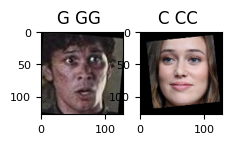

BATCH 6
Len images:  2
tf.Tensor(b'A AA ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'F FF ', shape=(), dtype=string)


(128, 128, 3)

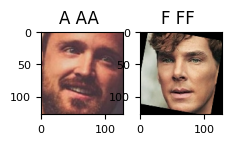

BATCH 7
Len images:  2
tf.Tensor(b'E EE ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'I II ', shape=(), dtype=string)


(128, 128, 3)

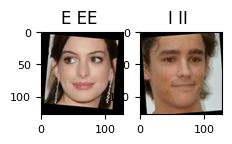

BATCH 8
Len images:  2
tf.Tensor(b'H HH ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'B BB ', shape=(), dtype=string)


(128, 128, 3)

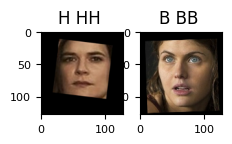

BATCH 9
Len images:  2
tf.Tensor(b'D DD ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'Z BILL  ', shape=(), dtype=string)


(128, 128, 3)

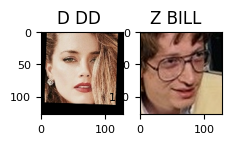

BATCH 10
Len images:  2
tf.Tensor(b'A AA ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'G GG ', shape=(), dtype=string)


(128, 128, 3)

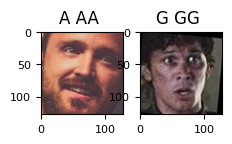

BATCH 11
Len images:  2
tf.Tensor(b'B BB ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'C CC ', shape=(), dtype=string)


(128, 128, 3)

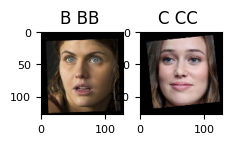

BATCH 12
Len images:  2
tf.Tensor(b'D DD ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'F FF ', shape=(), dtype=string)


(128, 128, 3)

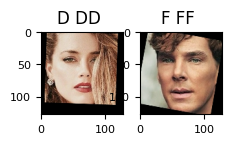

BATCH 13
Len images:  2
tf.Tensor(b'Z BILL  ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'I II ', shape=(), dtype=string)


(128, 128, 3)

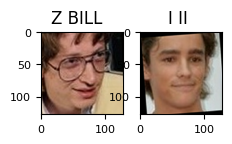

BATCH 14
Len images:  2
tf.Tensor(b'E EE ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'H HH ', shape=(), dtype=string)


(128, 128, 3)

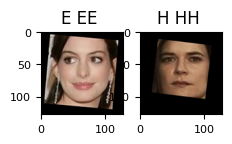

BATCH 15
Len images:  2
tf.Tensor(b'E EE ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'I II ', shape=(), dtype=string)


(128, 128, 3)

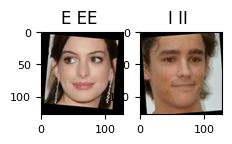

BATCH 16
Len images:  2
tf.Tensor(b'Z BILL  ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'A AA ', shape=(), dtype=string)


(128, 128, 3)

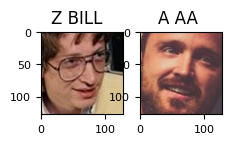

BATCH 17
Len images:  2
tf.Tensor(b'D DD ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'H HH ', shape=(), dtype=string)


(128, 128, 3)

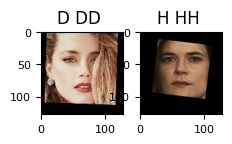

BATCH 18
Len images:  2
tf.Tensor(b'G GG ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'B BB ', shape=(), dtype=string)


(128, 128, 3)

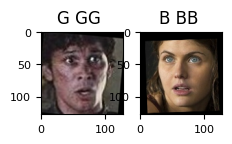

BATCH 19
Len images:  2
tf.Tensor(b'C CC ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'F FF ', shape=(), dtype=string)


(128, 128, 3)

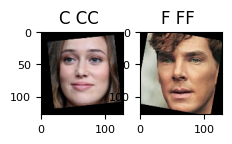

BATCH 20
Len images:  2
tf.Tensor(b'I II ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'A AA ', shape=(), dtype=string)


(128, 128, 3)

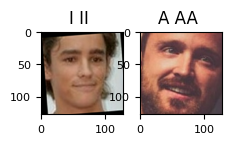

BATCH 21
Len images:  2
tf.Tensor(b'B BB ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'H HH ', shape=(), dtype=string)


(128, 128, 3)

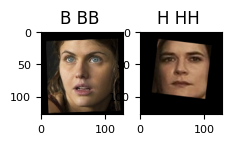

BATCH 22
Len images:  2
tf.Tensor(b'G GG ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'Z BILL  ', shape=(), dtype=string)


(128, 128, 3)

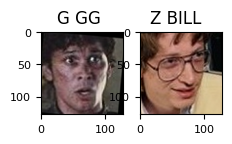

BATCH 23
Len images:  2
tf.Tensor(b'E EE ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'C CC ', shape=(), dtype=string)


(128, 128, 3)

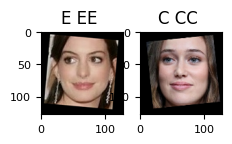

BATCH 24
Len images:  2
tf.Tensor(b'D DD ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'F FF ', shape=(), dtype=string)


(128, 128, 3)

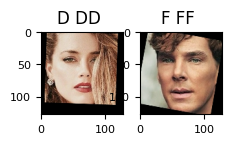

BATCH 25
Len images:  2
tf.Tensor(b'C CC ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'G GG ', shape=(), dtype=string)


(128, 128, 3)

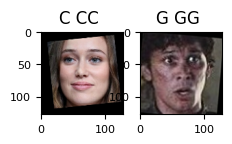

BATCH 26
Len images:  2
tf.Tensor(b'A AA ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'D DD ', shape=(), dtype=string)


(128, 128, 3)

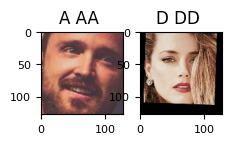

BATCH 27
Len images:  2
tf.Tensor(b'Z BILL  ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'H HH ', shape=(), dtype=string)


(128, 128, 3)

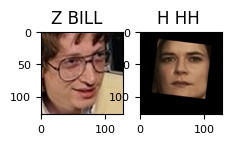

BATCH 28
Len images:  2
tf.Tensor(b'F FF ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'B BB ', shape=(), dtype=string)


(128, 128, 3)

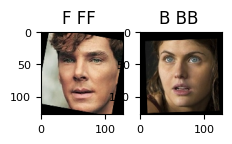

BATCH 29
Len images:  2
tf.Tensor(b'I II ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'E EE ', shape=(), dtype=string)


(128, 128, 3)

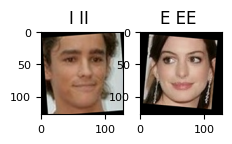

BATCH 30
Len images:  2
tf.Tensor(b'D DD ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'H HH ', shape=(), dtype=string)


(128, 128, 3)

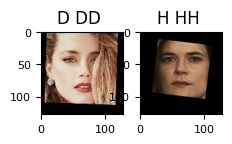

BATCH 31
Len images:  2
tf.Tensor(b'F FF ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'A AA ', shape=(), dtype=string)


(128, 128, 3)

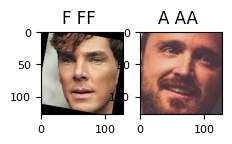

BATCH 32
Len images:  2
tf.Tensor(b'G GG ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'B BB ', shape=(), dtype=string)


(128, 128, 3)

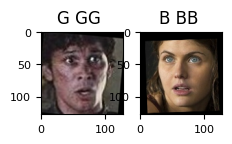

BATCH 33
Len images:  2
tf.Tensor(b'Z BILL  ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'C CC ', shape=(), dtype=string)


(128, 128, 3)

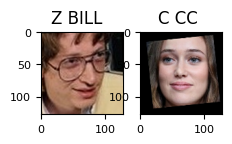

BATCH 34
Len images:  2
tf.Tensor(b'E EE ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'I II ', shape=(), dtype=string)


(128, 128, 3)

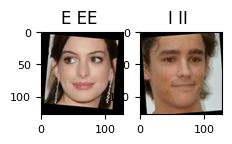

BATCH 35
Len images:  2
tf.Tensor(b'F FF ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'H HH ', shape=(), dtype=string)


(128, 128, 3)

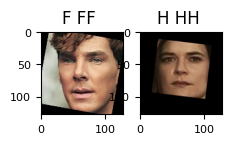

BATCH 36
Len images:  2
tf.Tensor(b'G GG ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'E EE ', shape=(), dtype=string)


(128, 128, 3)

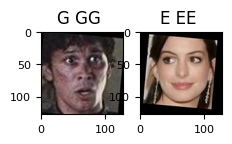

BATCH 37
Len images:  2
tf.Tensor(b'B BB ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'Z BILL  ', shape=(), dtype=string)


(128, 128, 3)

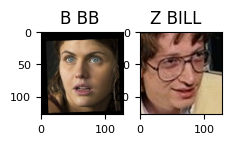

BATCH 38
Len images:  2
tf.Tensor(b'D DD ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'I II ', shape=(), dtype=string)


(128, 128, 3)

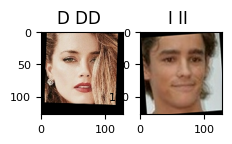

BATCH 39
Len images:  2
tf.Tensor(b'C CC ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'A AA ', shape=(), dtype=string)


(128, 128, 3)

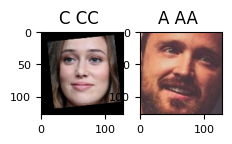

BATCH 40
Len images:  2
tf.Tensor(b'H HH ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'F FF ', shape=(), dtype=string)


(128, 128, 3)

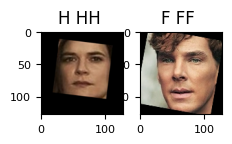

BATCH 41
Len images:  2
tf.Tensor(b'D DD ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'G GG ', shape=(), dtype=string)


(128, 128, 3)

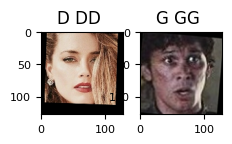

BATCH 42
Len images:  2
tf.Tensor(b'C CC ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'A AA ', shape=(), dtype=string)


(128, 128, 3)

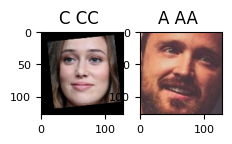

BATCH 43
Len images:  2
tf.Tensor(b'E EE ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'Z BILL  ', shape=(), dtype=string)


(128, 128, 3)

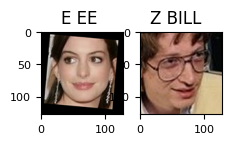

BATCH 44
Len images:  2
tf.Tensor(b'B BB ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'I II ', shape=(), dtype=string)


(128, 128, 3)

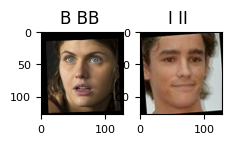

BATCH 45
Len images:  2
tf.Tensor(b'C CC ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'G GG ', shape=(), dtype=string)


(128, 128, 3)

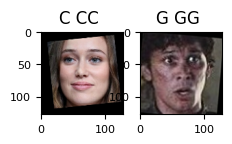

BATCH 46
Len images:  2
tf.Tensor(b'D DD ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'Z BILL  ', shape=(), dtype=string)


(128, 128, 3)

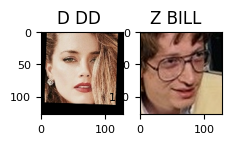

BATCH 47
Len images:  2
tf.Tensor(b'I II ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'E EE ', shape=(), dtype=string)


(128, 128, 3)

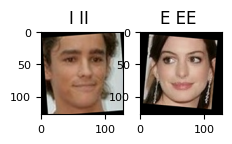

BATCH 48
Len images:  2
tf.Tensor(b'A AA ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'F FF ', shape=(), dtype=string)


(128, 128, 3)

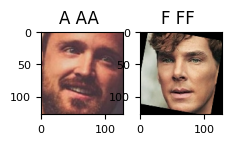

BATCH 49
Len images:  2
tf.Tensor(b'B BB ', shape=(), dtype=string)


(128, 128, 3)

tf.Tensor(b'H HH ', shape=(), dtype=string)


(128, 128, 3)

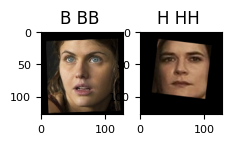

In [139]:
show_batch_examples(dataset_batched, 200)


In [194]:
data = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([5, 128, 128, 3]), tf.random.uniform([5], maxval=10, dtype=tf.int32))
)

for e0, e1 in data:
    print(type(e0), type(e1), e1)


<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(8, shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(9, shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(9, shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(4, shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(4, shape=(), dtype=int32)
